C'est le début de la fin


In [109]:
!pip install pandas
!pip install statsmodels

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime
import random
import math 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [111]:
# Ouvrir et lire le fichier CSV
# URL du fichier CSV
csv_url = 'https://www.data.gouv.fr/fr/datasets/r/47ac11c2-8a00-46a7-9fa8-9b802643f975'

# Lire le fichier CSV depuis l'URL dans un DataFrame
df_festival = pd.read_csv(csv_url, sep = ';')
#print(df_festival.head())

I - On cherche à faire un histogramme des dates de création des festivals 

A) Certaines données de cette colonne sont des dates, qu'on converti en leur année

    Mais on a aussi un pb pc
    q certaines données sont "53ème" (??) 

In [112]:
col_array = np.array(df_festival['annee_de_creation_du_festival'])

# Fonction pour générer un nombre aléatoire dans la décennie
def annee_aleatoire(decennie):
    decennie_str = str(decennie)
    annees = re.findall(r'\d{4}', decennie_str)
    if annees:
        debut_decennie = int(annees[0])
        return np.random.randint(debut_decennie, debut_decennie + 10)
    else:
        return None

# Remplacer les valeurs non valides (qui ne sont pas une année ou une date) par un nombre aléatoire dans la décennie
col = np.array([float(datetime.strptime(str(date), '%d/%m/%Y %H:%M').year) if re.match(r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}$', str(date)) else float(date) if re.match(r'\d{4}$', str(date)) else annee_aleatoire(df_festival.at[i, 'decennie_de_creation_du_festival']) for i, date in enumerate(col_array)])

# Créer une colonne dans le DataFrame initial
df_festival['annee_creation'] = col

# On crée un nouveau vecteur (?) sans les valeurs None pour pouvoir faire des plots
col_None = [x for x in col if x is not None]

# Afficher le DataFrame mis à jour
#print(df_festival[['annee_de_creation_du_festival', 'annee_creation']])


B) On se sert de cette colonne pour faire un histogramme


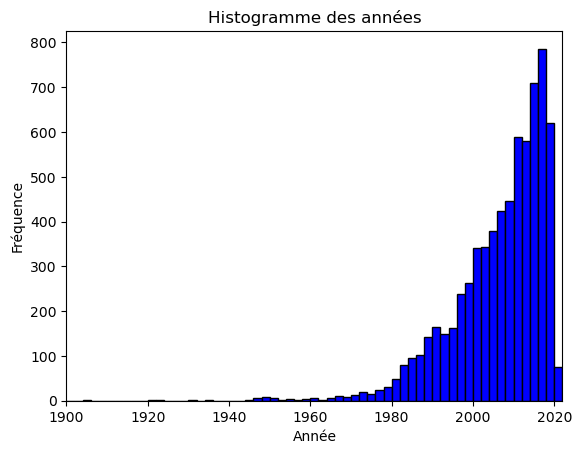

In [113]:

#Afficher l'histogramme 

plt.hist(col_None, bins=np.arange(1900, max(col_None) + 2, 2), color='blue', edgecolor='black')
plt.xlabel('Année')
plt.ylabel('Fréquence')
plt.title('Histogramme des années')
plt.xlim(1900, max(col_None))
plt.show()

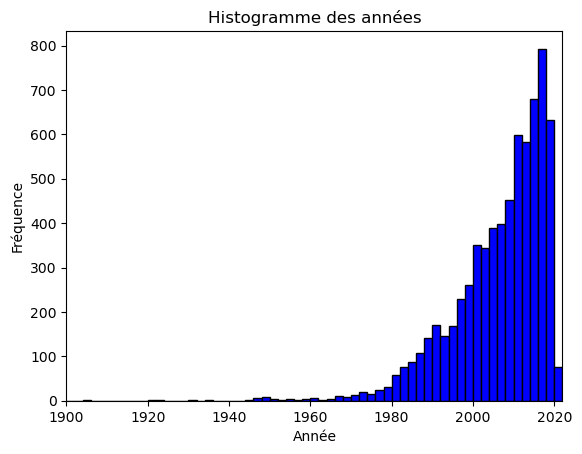

C) On nettoye la base commune 


In [114]:
# Chemin vers le fichier Excel (XLSX)
xlsx_file_path = '/Users/maelieperier/OneDrive/2A/ENSAE/base-cc-evol-struct-pop-2019.xlsx'

# Lire le fichier Excel dans un DataFrame
df = pd.read_excel(xlsx_file_path)

# Chemin de destination pour le fichier CSV
csv_commune = '/Users/maelieperier/OneDrive/2A/ENSAE/base-cc-evol-struct-pop-2019.csv'

# Convertir le DataFrame en fichier CSV
df.to_csv(csv_commune, index=False)

# Afficher les premières lignes du DataFrame converti en CSV
df_csv = pd.read_csv(csv_commune)


/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_30759/764890673.py:14: DtypeWarning: Columns (0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_commune)


In [115]:
nouvelles_colonnes = {
    'Chiffres détaillés – Évolution et structure de la population': 'code_insee_commune', 
    'Unnamed: 1': 'Région',
    'Unnamed: 2': 'Département',
    'Unnamed: 3': 'Libellé géographique', 
    'Unnamed: 4': 'Population en 2019 (princ)',
    'Unnamed: 5': 'Pop 0-14 ans en 2019 (princ)',
    'Unnamed: 6': 'Pop 15-29 ans en 2019 (princ)',
    'Unnamed: 7': 'Pop 30-44 ans en 2019 (princ)',
    'Unnamed: 8': 'Pop 45-59 ans en 2019 (princ)',
    'Unnamed: 9': 'Pop 60-74 ans en 2019 (princ)', 
    'Unnamed: 10': 'Pop 75-89 ans en 2019 (princ)',
    'Unnamed: 11': 'Pop 90 ans ou plus en 2019 (princ)',  
    'Unnamed: 54': 'Pop 15 ans ou plus en 2019 (compl)',
    'Unnamed: 55': 'Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 
    'Unnamed: 56': 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
    'Unnamed: 57': 'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)', 
    'Unnamed: 58': 'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 
    'Unnamed: 59': 'Pop 15 ans ou plus Employés en 2019 (compl)', 
    'Unnamed: 60': 'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 
    'Unnamed: 61': 'Pop 15 ans ou plus Retraités en 2019 (compl)', 
    'Unnamed: 62': 'Pop 15 ans ou plus Autres en 2019 (compl)'
    }

df_csv = df_csv.rename(columns=nouvelles_colonnes)

#print(df_csv.columns)

# Épurer la base de données (conserver que les colonnes et lignes utiles, arrondir population...)

colonnes_a_conserver = ['code_insee_commune', 'Région', 'Département', 
                        'Libellé géographique', 'Population en 2019 (princ)', 
                        'Pop 0-14 ans en 2019 (princ)', 'Pop 15-29 ans en 2019 (princ)', 'Pop 30-44 ans en 2019 (princ)', 
                        'Pop 45-59 ans en 2019 (princ)', 'Pop 60-74 ans en 2019 (princ)', 'Pop 75-89 ans en 2019 (princ)', 
                        'Pop 90 ans ou plus en 2019 (princ)', 'Pop 15 ans ou plus en 2019 (compl)', 
                        'Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl)', 'Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)', 
                        'Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)', 'Pop 15 ans ou plus Prof. intermédiaires  en 2019 (compl)', 
                        'Pop 15 ans ou plus Employés en 2019 (compl)', 'Pop 15 ans ou plus Ouvriers en 2019 (compl)', 'Pop 15 ans ou plus Retraités en 2019 (compl)', 
                        'Pop 15 ans ou plus Autres en 2019 (compl)']



df_csv = df_csv[colonnes_a_conserver]
df_communes = df_csv.drop(index=[0,1,2]).reset_index(drop=True)

# Transformer en int les éléments des colonnes numériques (qui ont des types ≠)

for colonne in df_communes.columns[4:]:
    df_communes[colonne][2:] = pd.to_numeric(df_communes[colonne][2:], errors='coerce').round().astype('Int64')


On crée une nouvelle colonne qui nous donne la tranche d'âge majoritaire dans chaque commune, c'est un proxy de moyenne d'âge des habitants. 
On fait en sorte de numéroter les différentes tranches d'âge afin de pouvoir les comparer entre elles plus tard

In [116]:
tranches_age = ['Pop 0-14 ans en 2019 (princ)', 'Pop 15-29 ans en 2019 (princ)', 
                'Pop 30-44 ans en 2019 (princ)', 'Pop 45-59 ans en 2019 (princ)', 
                'Pop 60-74 ans en 2019 (princ)', 'Pop 75-89 ans en 2019 (princ)', 
                'Pop 90 ans ou plus en 2019 (princ)']

df_communes[tranches_age] = df_communes[tranches_age].apply(pd.to_numeric, errors='coerce')



tranchemax = df_communes[tranches_age].idxmax(axis=1)

tranchemax = df_communes[tranches_age].idxmax(axis=1).fillna('Nan')

df_communes['numerotation_tranche'] = tranchemax.apply(lambda x: tranches_age.index(x) if x != 'Nan' else pd.NA)

df_communes['numerotation_tranche'] = df_communes['numerotation_tranche'].astype('Int64') 

mapping_tranches_age = {
    0: '0 - Pop 0-14 ans en 2019 (princ)',
    1: '1 - Pop 15-29 ans en 2019 (princ)',
    2: '2 - Pop 30-44 ans en 2019 (princ)',
    3: '3 - Pop 45-59 ans en 2019 (princ)',
    4: '4 - Pop 60-74 ans en 2019 (princ)',
    5: '5 - Pop 75-89 ans en 2019 (princ)',
    6: '6 - Pop 90 ans ou plus en 2019 (princ)'
}

df_communes['tranche_age_majoritaire'] = (
    df_communes['numerotation_tranche'].map(mapping_tranches_age).astype(str) 
)

#Finalement on laisse la numératotation tranche qui agit comme dummy variable pour la regression plus tard
#df_communes = df_communes.drop(columns=['numerotation_tranche'], errors='ignore')

df_communes.head()

,code_insee_commune,Région,Département,Libellé géographique,Population en 2019 (princ),Pop 0-14 ans en 2019 (princ),Pop 15-29 ans en 2019 (princ),Pop 30-44 ans en 2019 (princ),Pop 45-59 ans en 2019 (princ),Pop 60-74 ans en 2019 (princ),...,Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl),"Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)","Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),numerotation_tranche,tranche_age_majoritaire
0,Code géographique,Région,Département,Libellé géographique,Population en 2019 (princ),NaN,NaN,NaN,NaN,NaN,...,Pop 15 ans ou plus Agriculteurs exploitants en...,"Pop 15 ans ou plus Artisans, Comm., Chefs entr...","Pop 15 ans ou plus Cadres, Prof. intel. sup. e...",Pop 15 ans ou plus Prof. intermédiaires en 20...,Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),<NA>,nan
1,CODGEO,REG,DEP,LIBGEO,P19_POP,NaN,NaN,NaN,NaN,NaN,...,C19_POP15P_CS1,C19_POP15P_CS2,C19_POP15P_CS3,C19_POP15P_CS4,C19_POP15P_CS5,C19_POP15P_CS6,C19_POP15P_CS7,C19_POP15P_CS8,<NA>,nan
2,01001,84,01,L'Abergement-Clémenciat,779,159.0,102.0,132.0,194.0,131.0,...,16,20,76,98,101,127,153,30,3,3 - Pop 45-59 ans en 2019 (princ)
3,01002,84,01,L'Abergement-de-Varey,256,59.0,30.0,74.0,39.0,35.0,...,0,21,16,26,42,11,67,22,2,2 - Pop 30-44 ans en 2019 (princ)
4,01004,84,01,Ambérieu-en-Bugey,14134,2642.0,3077.0,2730.0,2391.0,2054.0,...,3,327,784,1890,1891,2002,2763,1848,1,1 - Pop 15-29 ans en 2019 (princ)


D) Merge des deux 


In [117]:
# Fusionner les DataFrames sur la colonne 'Code commune'
df_merged = pd.merge(df_festival, df_communes, on='code_insee_commune', how='left')

# Afficher les premières lignes du DataFrame résultant
df_merged.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,...,Pop 15 ans ou plus Agriculteurs exploitants en 2019 (compl),"Pop 15 ans ou plus Artisans, Comm., Chefs entr. en 2019 (compl)","Pop 15 ans ou plus Cadres, Prof. intel. sup. en 2019 (compl)",Pop 15 ans ou plus Prof. intermédiaires en 2019 (compl),Pop 15 ans ou plus Employés en 2019 (compl),Pop 15 ans ou plus Ouvriers en 2019 (compl),Pop 15 ans ou plus Retraités en 2019 (compl),Pop 15 ans ou plus Autres en 2019 (compl),numerotation_tranche,tranche_age_majoritaire
0,Tous courts,Départementale,Provence-Alpes-Côte d'Azur,Bouches-Du-Rhône,Aix-en-Provence,13100,13001,200054807,Métropole d'Aix-Marseille-Provence,1,...,199,4490,20110,18211,17305,7646,27613,30044,1,1 - Pop 15-29 ans en 2019 (princ)
1,Les enchanteurs,Régionale,Hauts-de-France,Pas-de-Calais,Aix-Noulette,62160,62019,246200364,CA de Lens - Liévin,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
2,Corsica polar,Régional,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,99,2358,3457,7751,12040,6488,15565,11656,2,2 - Pop 30-44 ans en 2019 (princ)
3,Festival international de la BD,Régional,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,...,99,2358,3457,7751,12040,6488,15565,11656,2,2 - Pop 30-44 ans en 2019 (princ)
4,Les estivales,Intercommunale,Provence-Alpes-Côte d'Azur,Bouches-Du-Rhône,Allauch,13190,13002,200054807,Métropole d'Aix-Marseille-Provence,NaN,...,10,794,2145,3240,2675,1253,5405,2409,3,3 - Pop 45-59 ans en 2019 (princ)


E) Stats descriptives


E) 1- 

    Réparition des types de festivals 

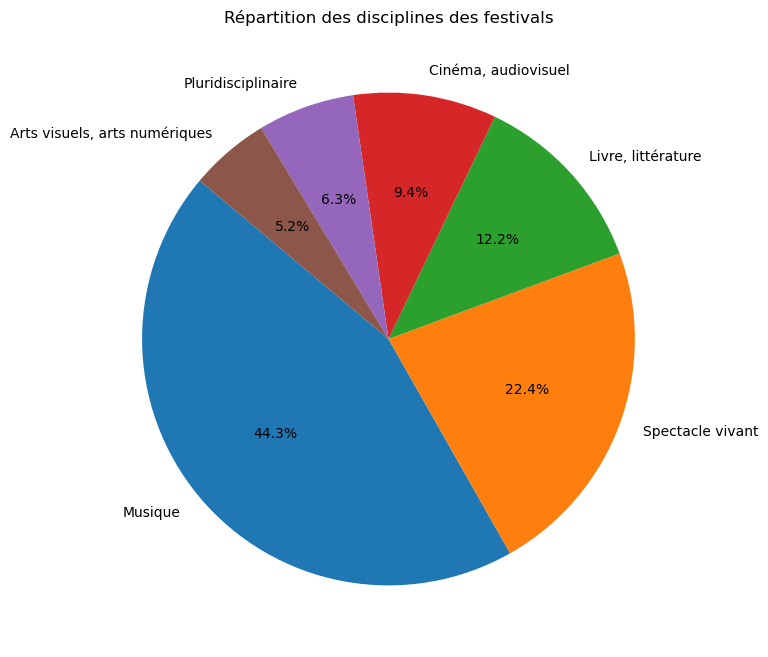

In [118]:
discipline_dom = df_festival['discipline_dominante'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(discipline_dom, labels= discipline_dom.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des disciplines des festivals')
plt.show()

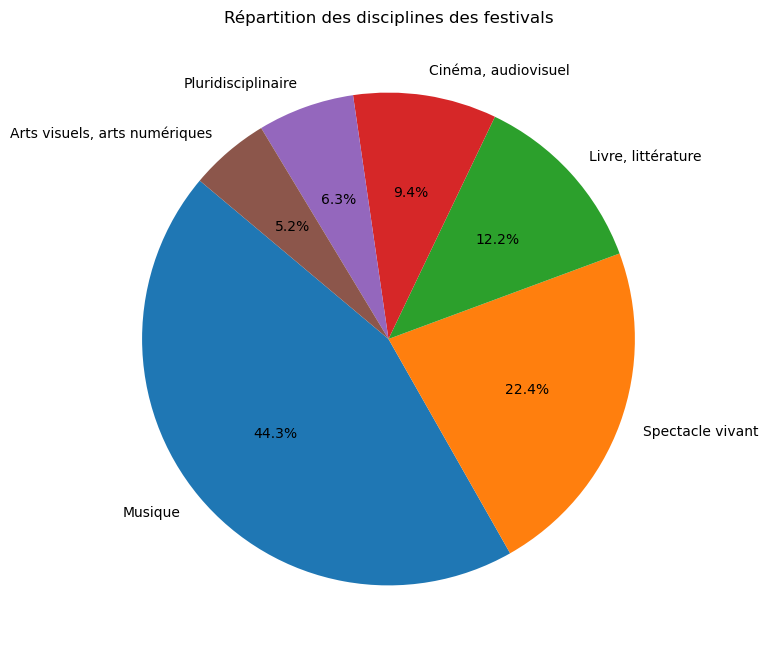

On se concentre sur la discipline la plus représentée

In [119]:
print(df_festival['discipline_dominante'].value_counts())

Musique                          3228
Spectacle vivant                 1633
Livre, littérature                892
Cinéma, audiovisuel               685
Pluridisciplinaire                462
Arts visuels, arts numériques     382
Name: discipline_dominante, dtype: int64


La majorité des festivals sont des festivals de musique.
Travail sur la colonne sous catégorie de musique cnm 

Les catégories flous (musiques sans distinction esthétique, pluridisciplinaire) ou celles qui sont à la marge de la discipline (humour, comédie musicale...) sont placées dans autres pour clarifier la lecture des statistiques descriptives. 

In [120]:
mapping_sous_mus = {
    '1- Chanson' : 'Chanson',
    '02- Musiques amplifiées ou électroniques' : 'Électro',
    '03- Jazz, blues et musiques improvisées' : 'Jazz, blues',
    '04- Musiques traditionnelles et du monde' : 'Musique du monde',
    '05- Humour': 'Autres',
    '07- Musiques actuelles sans distinction': 'Musiques actuelles',
    '08- Musiques (sans distinction esthétique)' : 'Sans sous catégorie',
    '09- Pluridisciplinaire': 'Pluridisciplinaire',
    '10- Comédie musicale': 'Autres',
    '11- Musique classique, lyrique, contemporaine, autres': 'Musique classique',
    '13- Autres spectacles (théâtre, arts de la rue et du cirque...)': 'Autres',
    '14- Autres disciplines culturelles (arts plastiques, cinéma, photographie, livre...)': 'Autres',
    '15- Fête de la ville, feria, fête votive, fête de la pomme, etc.': 'Fêtes de villes ou villages'
}


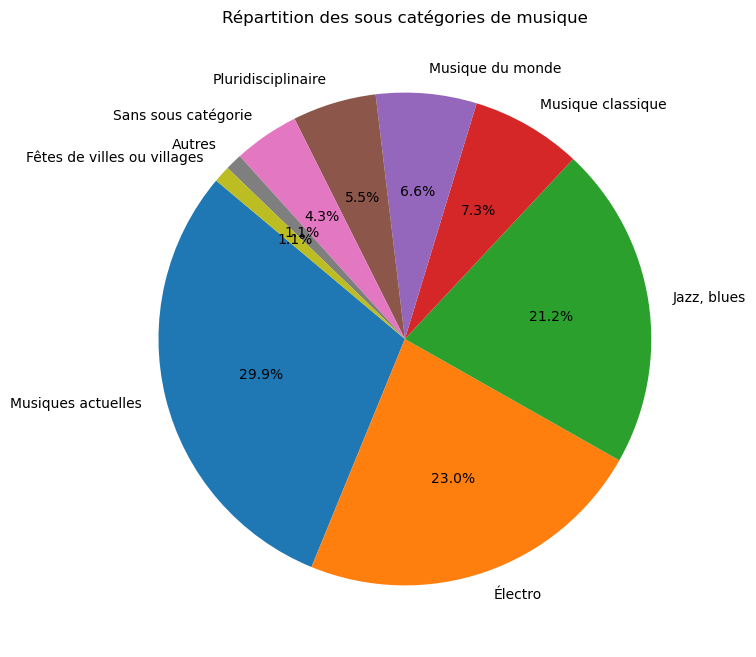

In [121]:
musique_dom = df_festival['sous_categorie_musique_cnm'].map(mapping_sous_mus).value_counts()

plt.figure(figsize=(8,8))
plt.pie(musique_dom, labels= musique_dom.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des sous catégories de musique')
plt.show()

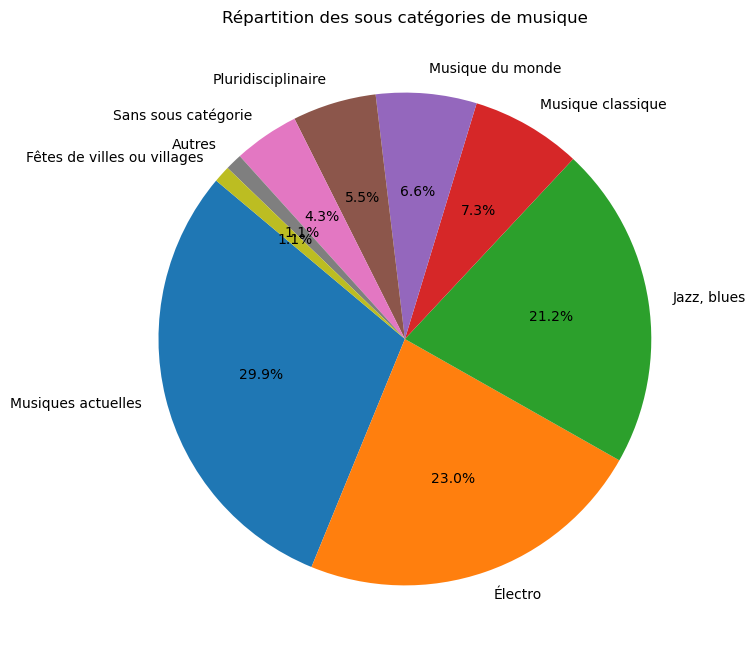

In [122]:
festivals_musique_classique = df_merged[df_merged['sous_categorie_musique_cnm'] == '11- Musique classique, lyrique, contemporaine, autres']
festivals_electro = df_merged[df_merged['sous_categorie_musique_cnm'] == '02- Musiques amplifiées ou électroniques']


print(df_merged['tranche_age_majoritaire'].mode())
print(df_merged['tranche_age_majoritaire'].value_counts())
print(festivals_musique_classique['tranche_age_majoritaire'].mode())
print(festivals_musique_classique['tranche_age_majoritaire'].value_counts())
print(festivals_electro['tranche_age_majoritaire'].mode())
print(festivals_electro['tranche_age_majoritaire'].value_counts())

0    3 - Pop 45-59 ans en 2019 (princ)
Name: tranche_age_majoritaire, dtype: object
3 - Pop 45-59 ans en 2019 (princ)    1234
4 - Pop 60-74 ans en 2019 (princ)     943
1 - Pop 15-29 ans en 2019 (princ)     936
0 - Pop 0-14 ans en 2019 (princ)      207
2 - Pop 30-44 ans en 2019 (princ)     205
5 - Pop 75-89 ans en 2019 (princ)       6
Name: tranche_age_majoritaire, dtype: int64
0    4 - Pop 60-74 ans en 2019 (princ)
Name: tranche_age_majoritaire, dtype: object
4 - Pop 60-74 ans en 2019 (princ)    14
1 - Pop 15-29 ans en 2019 (princ)    12
3 - Pop 45-59 ans en 2019 (princ)     8
0 - Pop 0-14 ans en 2019 (princ)      1
2 - Pop 30-44 ans en 2019 (princ)     1
Name: tranche_age_majoritaire, dtype: int64
0    1 - Pop 15-29 ans en 2019 (princ)
Name: tranche_age_majoritaire, dtype: object
1 - Pop 15-29 ans en 2019 (princ)    32
3 - Pop 45-59 ans en 2019 (princ)    28
4 - Pop 60-74 ans en 2019 (princ)    22
0 - Pop 0-14 ans en 2019 (princ)      7
2 - Pop 30-44 ans en 2019 (princ)     3
5 - Pop 

On voit que la tranche d'âge majoritraire dans la plupart des communes est la tranche d'âge 45-59 ans. Tandis que les festivals de musique classique sont dans des communes où en moyenne, la tranche d'âge majoritaire est plus âgée (60-74 ans). Et 15-29 ans pour les communes dans lesquelles il y a de la musique électro. 

In [123]:
print(df_merged['region_principale_de_deroulement'].value_counts())

Auvergne-Rhône-Alpes          947
Provence-Alpes-Côte d'Azur    942
Occitanie                     903
Nouvelle-Aquitaine            828
Île-de-France                 654
Bretagne                      590
Grand Est                     468
Bourgogne-Franche-Comté       442
Centre-Val de Loire           357
Hauts-de-France               338
Pays de la Loire              332
Normandie                     267
Corse                          69
Guadeloupe                     44
La Réunion                     41
Guyane                         19
Martinique                     15
Mayotte                         9
Polynésie française             7
Nouvelle-Calédonie              5
Saint-Barthélemy                3
Saint-Pierre-et-Miquelon        2
Name: region_principale_de_deroulement, dtype: int64


Reg : estimer la discipline dominante du festival en fonction de 1) âge de la commune 2) région? 

In [125]:
features = ['region_principale_de_deroulement']
features.append(df_merged['tranche_age_majoritaire'].astype(str).strr[0])

df_regression  = df_merged.dropna(subset=features + ['discipline_dominante'])



AttributeError: 'Series' object has no attribute 'strr'

In [135]:
print(df_communes['numerotation_tranche'])

0        <NA>
1        <NA>
2           3
3           2
4           1
         ... 
34935       0
34936       0
34937       0
34938       3
34939       3
Name: numerotation_tranche, Length: 34940, dtype: Int64


In [134]:
print(f"Nombre de valeurs manquantes dans 'tranche_age_majoritaire': {df_merged['numerotation_tranche'].isna().sum()}")
print(len(df_merged))
print(df_merged['numerotation_tranche'].dtypes)


Nombre de valeurs manquantes dans 'tranche_age_majoritaire': 3751
7282
Int64


In [142]:
# Exclure les lignes avec des valeurs manquantes dans 'tranche_age_majoritaire'
data_filtered = df_merged.dropna(subset=['numerotation_tranche'])

data_filtered['numerotation_tranche'] = data_filtered['numerotation_tranche'].astype('int64')
print(data_filtered['discipline_dominante'])

data_filtered['discipline_dominante'] = pd.Categorical(data_filtered['discipline_dominante']).codes

print(data_filtered['discipline_dominante'])

# Préparation des variables explicatives (caractéristiques) et de la variable cible
X_filtered = data_filtered[['numerotation_tranche']]
y_filtered = data_filtered['discipline_dominante']

# Créez le modèle de régression logistique multinomiale
model_filtered = smf.mnlogit(f'discipline_dominante ~ numerotation_tranche', data=data_filtered)  # Ajoutez une constante (intercept) aux données

# Ajustez le modèle aux données
results_filtered = model_filtered.fit()

# Obtenez un tableau récapitulatif des résultats
summary_filtered = results_filtered.summary()
print(summary_filtered)

# Pour savoir ce qu'il se passe 
cat_mapping = dict(enumerate(pd.Categorical(data_filtered['discipline_dominante']).categories))
print(cat_mapping)


/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_30759/3262152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['numerotation_tranche'] = data_filtered['numerotation_tranche'].astype('int64')
/var/folders/qw/b1h94pqd2pq3qzj8rr8wl1dw0000gn/T/ipykernel_30759/3262152514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['discipline_dominante'] = pd.Categorical(data_filtered['discipline_dominante']).codes


0                 Cinéma, audiovisuel
2                 Cinéma, audiovisuel
3                  Livre, littérature
4                    Spectacle vivant
5                    Spectacle vivant
11                   Spectacle vivant
12      Arts visuels, arts numériques
19                   Spectacle vivant
20                 Pluridisciplinaire
21                            Musique
24                            Musique
26                            Musique
27                   Spectacle vivant
29                            Musique
30                            Musique
31                            Musique
32                   Spectacle vivant
34                            Musique
36                 Livre, littérature
38                 Pluridisciplinaire
39                 Livre, littérature
40                Cinéma, audiovisuel
42                   Spectacle vivant
46                   Spectacle vivant
48                 Livre, littérature
50                            Musique
54          

In [93]:
"""
X = df_merged[['numerotation_tranche']]
y = df_merged['discipline_dominante']

# Créez le modèle de régression logistique multinomiale
model = sm.MNLogit(y, sm.add_constant(X))

# Ajustez le modèle aux données
results = model.fit()

# Obtenez un tableau récapitulatif des résultats
summary = results.summary()
print(summary)
"""

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [85]:
"""
# Sélectionner les colonnes pertinentes
df_regression = df_merged[['numerotation_tranche', 'discipline_dominante']]

# Supprimer les lignes avec des valeurs manquantes dans les colonnes sélectionnées
df_regression = df_regression.dropna()

# Diviser le DataFrame en ensembles d'entraînement et de test
train_df, test_df = train_test_split(df_regression, test_size=0.2, random_state=42)

# Séparer les variables indépendantes (X) et la variable dépendante (y) dans les ensembles d'entraînement et de test
X_train = train_df[['numerotation_tranche']]
y_train = train_df['discipline_dominante']
X_test = test_df[['numerotation_tranche']]
y_test = test_df['discipline_dominante']
# Ajouter une constante à X_train (intercept)
X_train = sm.add_constant(X_train)

# Créer le modèle de régression logistique
model = sm.Logit(y_train, X_train)

# Ajuster le modèle
result = model.fit()

# Afficher le résumé des résultats
print(result.summary())
"""

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).